In [136]:
import numpy as np
import importlib
import game
importlib.reload(game)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def draw(env):
    imgdata = env.frame()
    plt.imshow(imgdata)
    #print(np.max(imgdata), np.min(imgdata), np.average(imgdata))
    plt.show()

filename = 'data\K6D3n.npz'
with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)['data']

In [137]:
X : np.ndarray = a[:, 0]
Y : np.ndarray = a[:, 1]
Y = Y.astype(np.float32)
X = np.array(list(X))

(2575131, 16) (2575131,)
[ 0  1 -1  0  1 -1  1  0  1  0  0 -1  0 -1 -1  1] 1.8537188
player turn: 1
(15,)


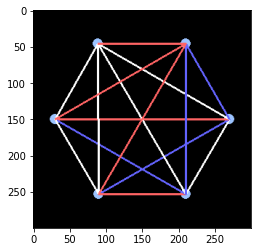

In [138]:
# some tests.
# draw test as well
import game
importlib.reload(game)
from game import ColorableCliqueGame

index = 45000
print(X.shape, Y.shape)
print(X[index], Y[index])
print("player turn:", X[45000][-1])


colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6, colors)
print(X[index][:-1].shape)
env.loadfrom1D(X[index])
draw(env)

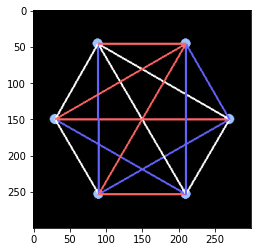

In [139]:
from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag, triangleP0_huristic, triangleSQR_huristic
random_move(env)
#env.loadfrom1D(X[index])
draw(env)

In [140]:
Y = np.tanh(Y)
Y[index]
print(X.shape, Y.shape)

(2575131, 16) (2575131,)


In [141]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,Y , test_size=0.20, random_state=42,shuffle=True)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred_test = lin_reg.predict(X_test)
lin_pred_train = lin_reg.predict(X_train)
r2_test = r2_score(y_test,lin_pred_test)
r2_train = r2_score(y_train,lin_pred_train)
print('R squared of Linear Regression for Test Date :', r2_test)
print('R squared of Linear Regression for Train Date :', r2_train)

R squared of Linear Regression for Test Date : 0.020862896897295702
R squared of Linear Regression for Train Date : 0.020334422451839917


In [143]:
print(Y.min(), Y.max(), Y.mean())

-1.0 1.0 -0.05112279


In [144]:
Y /= Y.max()
print(Y.min(), Y.max(), Y.mean())

-1.0 1.0 -0.05112279


In [147]:
from sklearn.metrics import mean_squared_error


target_predicted = lin_reg.predict(X_test)
mean_squared_error(y_test, target_predicted) 

0.7773276164461589

In [148]:
index = 135500
print(Y[index:index+3])
lin_reg.predict(X[index:index+3])

[ 0.952095 -1.       -1.      ]


array([ 0.03800678, -0.14482403,  0.05980468])

In [9]:
# from sklearn.preprocessing import PolynomialFeatures
# from tqdm import tqdm
# poly_fea = PolynomialFeatures(degree=3)
# X_poly_train  = poly_fea.fit_transform(X_train)
# X_poly_test  = poly_fea.fit_transform(X_test)

In [10]:
# lin_reg.fit(X_poly_train,y_train)
# lin_pred_test = lin_reg.predict(X_poly_test)
# lin_pred_train = lin_reg.predict(X_poly_train)
# r2_test = r2_score(y_test,lin_pred_test)
# r2_train = r2_score(y_train,lin_pred_train)
# print('R squared of Linear Regression for Test Date :', r2_test)
# print('R squared of Linear Regression for Train Date :', r2_train)

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_poly_train)
# X_test_scaled = scaler.transform(X_poly_test)

# print(np.min(X_train_scaled))
# print(np.max(X_train_scaled))

In [12]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_scaled[::3],y_train[::3])
# lin_pred_test = lin_reg.predict(X_test_scaled)
# lin_pred_train = lin_reg.predict(X_train_scaled)
# r2_test = r2_score(y_test,lin_pred_test)
# r2_train = r2_score(y_train,lin_pred_train)
# print('R squared of Linear Regression for Test Date :', r2_test)
# print('R squared of Linear Regression for Train Date :', r2_train)

In [149]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=21)
tree.fit(X_train[0::33], y_train[0::33])
# target_predicted = tree.predict(X_test)

DecisionTreeRegressor(max_depth=21)

In [150]:
target_predicted = tree.predict(X_test)
index = 105555
print(Y[index:index+3])
target_predicted[index: index + 3]

[-1.  1.  1.]


array([0.72912627, 0.        , 1.        ])

In [151]:
print(target_predicted.min(),target_predicted.max())

-1.0 1.0


In [152]:
from sklearn.metrics import mean_squared_error

print(y_test.mean(), y_test.var())
mean_squared_error(y_test, target_predicted) 

-0.051236484 0.7938905


0.7604463399006092

In [153]:
X_train[:10]

array([[ 1, -1,  0, -1,  0,  0,  1, -1, -1,  0, -1,  1,  1, -1,  1,  1],
       [-1,  0, -1, -1,  1, -1,  1,  1,  0,  1,  1,  0, -1, -1,  0,  1],
       [ 0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,  1,  0, -1,  0,  1],
       [ 0,  1,  1, -1, -1,  0,  0,  1,  1,  0,  0, -1,  1, -1, -1, -1],
       [ 0, -1, -1,  1,  0,  1,  0, -1,  0,  0,  1,  0,  0, -1,  1, -1],
       [ 1, -1, -1,  0,  1,  0,  0,  0, -1,  1, -1, -1,  1,  1, -1,  1],
       [-1, -1,  0,  0,  1,  0,  0,  1, -1,  0, -1,  1,  0,  1,  0, -1],
       [-1,  1,  0, -1,  1,  0,  1, -1,  1,  0,  0, -1,  1, -1,  0, -1],
       [ 0, -1,  0,  1,  0,  0,  0,  1, -1,  0,  1,  0,  0, -1, -1,  1],
       [-1,  1,  1,  0,  1, -1,  1, -1,  1, -1,  0,  0, -1, -1,  0,  1]],
      dtype=int64)

In [154]:
X_train[:10][0::3]

array([[ 1, -1,  0, -1,  0,  0,  1, -1, -1,  0, -1,  1,  1, -1,  1,  1],
       [ 0,  1,  1, -1, -1,  0,  0,  1,  1,  0,  0, -1,  1, -1, -1, -1],
       [-1, -1,  0,  0,  1,  0,  0,  1, -1,  0, -1,  1,  0,  1,  0, -1],
       [-1,  1,  1,  0,  1, -1,  1, -1,  1, -1,  0,  0, -1, -1,  0,  1]],
      dtype=int64)

In [155]:
# from sklearn.ensemble import RandomForestRegressor

# rfc = RandomForestRegressor(n_estimators=10, warm_start=True)
# skip = 33
# for i in range(skip):
#     print("[ Iteration", i, "]")
#     rfc.fit(X_train[i::skip], y_train[i::skip])
#     rfc.n_estimators += 10

# small rf
# from sklearn.ensemble import RandomForestRegressor

# rfc = RandomForestRegressor(n_estimators=10, warm_start=True, n_jobs=-1)
# skip = 57
# for i in range(skip):
#     print("[ Iteration", i, "]")
#     rfc.fit(X[i::skip], Y[i::skip])
#     rfc.n_estimators += 7

# from sklearn.ensemble import RandomForestRegressor

# rfc = RandomForestRegressor(n_estimators = 3, max_features = 'sqrt', max_depth = 25, n_jobs=-1)
# skip = 29
# for i in range(skip):
#     print("[ Iteration", i, "]")
#     rfc.fit(X[i::skip], Y[i::skip])
#     rfc.n_estimators += 3


# from sklearn.ensemble import RandomForestRegressor

# rfc = RandomForestRegressor(n_estimators=10, warm_start=True, n_jobs=-1)
# skip = 33
# for i in range(skip):
#     print("[ Iteration", i, "]")
#     rfc.fit(X[i::skip], Y[i::skip])
#     rfc.n_estimators += 10



from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=10, warm_start=True, n_jobs=-1)
skip = 33
for i in range(skip):
    print("[ Iteration", i, "]")
    rfc.fit(X[i::skip], Y[i::skip])
    rfc.n_estimators += 3

[ Iteration 0 ]
[ Iteration 1 ]
[ Iteration 2 ]
[ Iteration 3 ]
[ Iteration 4 ]
[ Iteration 5 ]
[ Iteration 6 ]
[ Iteration 7 ]
[ Iteration 8 ]
[ Iteration 9 ]
[ Iteration 10 ]
[ Iteration 11 ]


In [ ]:
target_predicted = rfc.predict(X_test)
print(target_predicted.min(),target_predicted.max())
print(y_test.mean(), y_test.var())
mean_squared_error(y_test, target_predicted) 

# bad data
# -0.9406021604032228 0.9901074871872411
# 0.3268287 0.8294521
# 0.12524284158403381

# small rf
# 0.11476633932994035

# rd5
#0.21614345669556595

-0.956509372878398 0.9226708430181837
-0.14258811 0.5677686


0.14589466306994375

In [21]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=41)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=41)

In [29]:
r = 900
target_predicted = neigh.predict(X_test[::r])
print(target_predicted.min(),target_predicted.max())
print(y_test.mean(), y_test.var())
mean_squared_error(y_test[::r], target_predicted) 

-1.0 1.0
-0.18923263 0.9463291


0.22103451

In [23]:
import joblib

rfr = rfc
joblib.dump(neigh, "./models/ni41.joblib", compress=9)

KeyboardInterrupt: 

In [ ]:
# loaded_rf = joblib.load("./models/ni41.joblib")

# target_predicted = loaded_rf.predict(X_test)
# mean_squared_error(y_test, target_predicted) 

KeyboardInterrupt: 

In [ ]:
import joblib

rfr = rfc
joblib.dump(rfr, "./models/rff_3.joblib", compress=9)

['./models/rfd3n.joblib']

In [100]:
#loaded_rf = joblib.load("./models/random_forest.joblib")
loaded_rf = joblib.load("./models/rff_3.joblib")

target_predicted = loaded_rf.predict(X_test)
mean_squared_error(y_test, target_predicted) 

FileNotFoundError: [Errno 2] No such file or directory: './models/rfd3n.joblib.joblib'

In [40]:
target_predicted = loaded_rf.predict(X)
mean_squared_error(Y, target_predicted) 

0.23494280923466032

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_informative=2,
                        random_state=0, shuffle=True)
regr = AdaBoostRegressor(random_state=0, n_estimators=500)
regr.fit(X_train[::37], y_train[::37])

AdaBoostRegressor(n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error

r = 900
target_predicted = regr.predict(X_test[::r])
print(target_predicted.min(),target_predicted.max())
print(y_test.mean(), y_test.var())
mean_squared_error(y_test[::r], target_predicted) 

-0.40658139982356434 0.18661919872175498
-0.10881827 0.8267105


0.772118619482909